In [29]:
import umap
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
from sklearn.preprocessing import LabelEncoder
import h5py

def get_labels(path_to_data):
    data_mat = h5py.File(
        f"{path_to_data}", "r")
    X = np.array(data_mat['X'])
    Y = np.array(data_mat['Y'])
    le = LabelEncoder()
    Y = le.fit_transform(Y)
    label_names = [s.decode('utf-8') for s in le.classes_]

    return label_names

In [32]:
#TODO: This cell is where you change the file paths for the data!

#Change this to the embeddings (.npy file)
path_to_embeddings = '/Volumes/AK_SSD/sc-DMAE_AK/Embeddings/Student_Best_Embedding/melanoma_student_16-99/embedding_99.npy'

#Change this to the labels (.txt file)
path_to_labels = '/Volumes/AK_SSD/sc-DMAE_AK/Embeddings/Student_Best_Embedding/melanoma_student_16-99/types_99.txt'

#Change this to the data path in order to extract label names. 
data_path = '/Volumes/AK_SSD/sc-DMAE_AK/Data/Melanoma.h5'

#Change to desired plot title
plot_title = 'Student Embeddings of Melanoma Dataset'


#Don't mess with anything below this line! It's where the UMAP reduction takes place! ~23 second runtime

#Load embeddings + labels.
embeddings = np.load(path_to_embeddings)
labels = np.genfromtxt(path_to_labels, delimiter=',', skip_header=1)[:, 1]
label_names = get_labels(data_path)

# Create UMAP reducer
reducer = umap.UMAP(n_components=2, random_state=42)

# Fit and transform the embeddings
embedding_2d = reducer.fit_transform(embeddings)

# Get the unique labels
unique_labels = np.unique(labels)

/Users/anthony/miniconda3/envs/dl_genomics_env/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/anthony/miniconda3/envs/dl_genomics_env/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


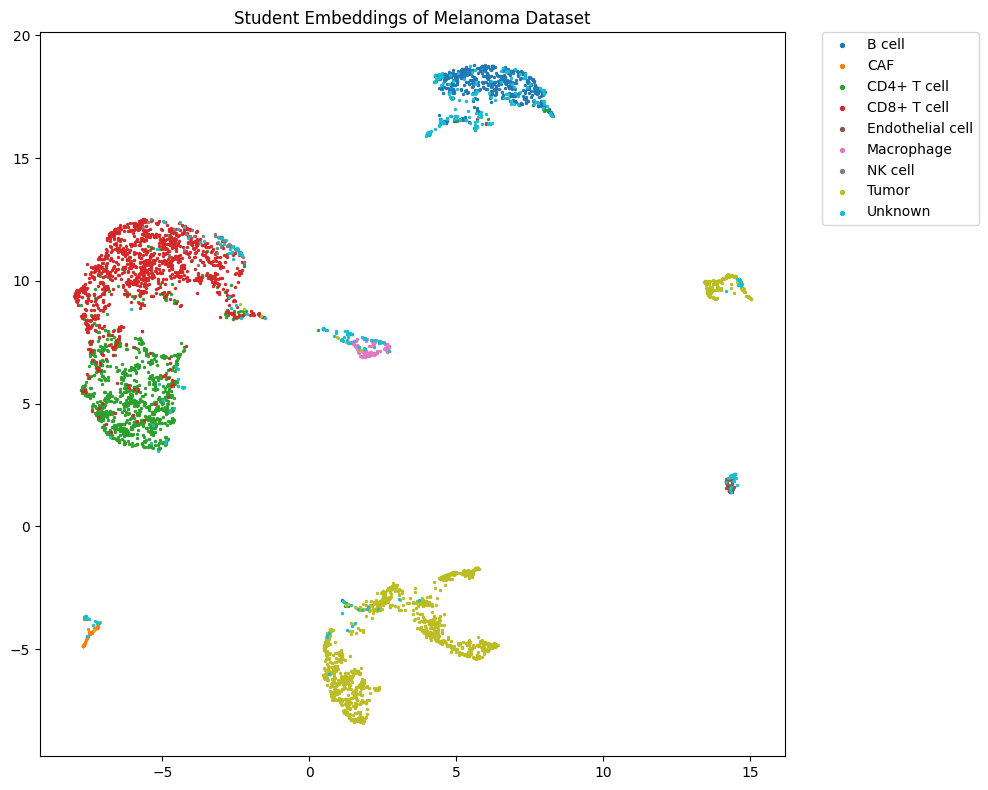

In [33]:
#Don't mess with this cell! This is where the figure is generated and displayed!

# Choose a discrete color palette
colors_list = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))  # or use 'Set1', 'tab20', etc.

# Create a figure
plt.figure(figsize=(10,8))

# Plot each label individually
for i, label in enumerate(unique_labels):
    idx = labels == label  # Find indices where label matches
    plt.scatter(
        embedding_2d[idx, 0],   # x values
        embedding_2d[idx, 1],   # y values
        color=colors_list[i],   # assign color
        label=str(label_names[i]),       # label for the legend
        s=2                   # size of the points
    )

# Add legend
plt.legend(markerscale=2, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title(plot_title)
plt.tight_layout()
plt.show()